<h1>View all Wavelengths</h1>

View all wavelengths of either an image or a difference image

TODO: make easy way to use an existing .fits file without going through Fido

Import stuff

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import sunpy.map
import sunpy.io.fits as fits
from sunpy.visualization import axis_labels_from_ctype
from sunpy.net import Fido, attrs as a
import astropy.units as u
from astropy.time import Time
import warnings

#select directory
%cd .

C:\myStuff\school\PHYS 477\AIAfiles


Specify the images to use and grab through Fido

In [2]:
cadence = 2*u.minute #Time before event to difference
start = Time('2021-01-04T12:48') #Time of the event, to minute precision
end = start + 59*u.second #End of the Fido search range

#Times for the prior image to difference with
prestart = start-cadence
preend = end-cadence

Search for and grab the images (will take a bit to run)

In [6]:
wvs = [94, 131, 171, 193, 211, 304, 335, 1600, 1700]*u.angstrom #available wavelengths (AA)

downds = []
predownds = []

for wvl in wvs:
    result = Fido.search(a.Time(start,end), a.Instrument.aia, a.Wavelength(wvl), a.Sample(cadence))
    preresult = Fido.search(a.Time(prestart,preend), a.Instrument.aia, a.Wavelength(wvl), a.Sample(cadence))
    
    downds.append(Fido.fetch(result, path='./{file}', progress=True))
    predownds.append(Fido.fetch(preresult, path='./{file}', progress=True))

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   0%|          | 0.00/12.6M [00:00<?, ?B/s]
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   0%|          | 100/12.6M [00:10<354:04:23, 9.88B/s]
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   0%|          | 50.9k/12.6M [00:10<29:37, 7.06kB/s] 
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   1%|          | 130k/12.6M [00:10<09:22, 22.2kB/s] 
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   2%|▏         | 211k/12.6M [00:10<04:44, 43.5kB/s]
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   3%|▎         | 334k/12.6M [00:10<02:20, 87.2kB/s]
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   4%|▍         | 484k/12.6M [00:10<01:16, 158kB/s] 
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   5%|▌         | 679k/12.6M [00:10<00:43, 277kB/s]
aia_lev1_1700a_2021_01_04t12_46_04_71z_image_lev1.fits:   7%|▋         | 909k/12.6

Create Sunpy Maps from the downloaded files

In [9]:
smap = [sunpy.map.Map(file) for file in downds]
presmap = [sunpy.map.Map(file) for file in predownds]

n_wvs = len(smap)

Create difference images

In [10]:
diffs = [sunpy.map.Map(smap[i].data-presmap[i].data, smap[i].meta)
         for i in range(n_wvs)]

Plot it out

Text(0.5, 0, 'Helioprojective Longitude (Solar-X) [arcsec]')

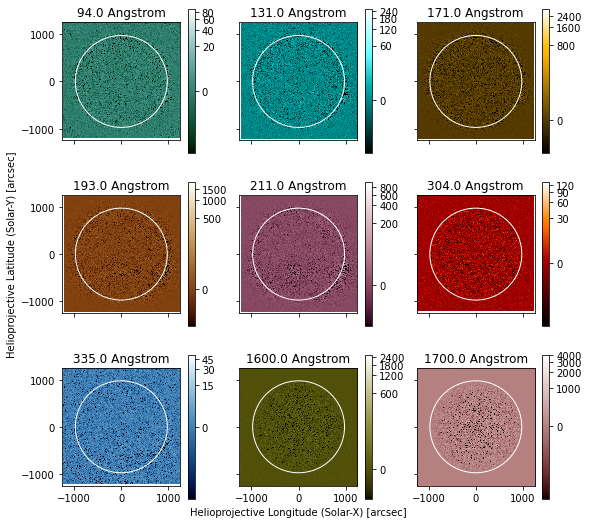

In [15]:
#Plot the 9 wavelengths in a 3-by-3 grid
fig, ax = plt.subplots(3,3, sharex=True, sharey=True, figsize=(9,9))
ax = ax.reshape(-1)

#set this to smap if you want to view just the event image
toplot = diffs

#suppress recurrent warning
warnings.filterwarnings("ignore")

for i in range(n_wvs):
    toplot[i].plot(axes=ax[i], clip_interval=(1,100)*u.percent, annotate=False)
    toplot[i].draw_limb() #draws a circle on the limb of the Sun
    ax[i].set_title(toplot[i].wavelength)

    cb = plt.colorbar()
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()

#share axis labels over the whole figure
ax[3].set_ylabel(axis_labels_from_ctype(toplot[3].coordinate_system[1],
                                        toplot[3].spatial_units[1]))
ax[7].set_xlabel(axis_labels_from_ctype(toplot[7].coordinate_system[0],
                                        toplot[7].spatial_units[0]))

There's no actual flare happening during these images, this is just an example